<a href="https://colab.research.google.com/github/martianjob/chatbot/blob/main/Capstone_FINAL_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
print('Importing Python Basic Libraries')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import string
import random, re
!pip install contractions
import contractions
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
% matplotlib inline
# for Visual Graphs/Representations
import matplotlib.pyplot as plt
% matplotlib inline
import plotly # for 3D representation
print ("Plotly Version : ")
print(plotly.__version__)
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import string
import random, re
from wordcloud import WordCloud,STOPWORDS
import nltk 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import contractions

# Basic packages
import gc
from scipy import stats; 
from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')

# Models
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve
from wordcloud import WordCloud, STOPWORDS

# Display settings
pd.options.display.max_rows = 400
pd.options.display.max_columns = 100
pd.options.display.float_format = "{:.2f}".format

random_state = 42
np.random.seed(random_state)

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

Importing Python Basic Libraries
Plotly Version : 
4.4.1


In [203]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [204]:
os.chdir('/content/drive/My Drive/Colab Notebooks')
# locading input data from csv 
print("Loading the input csv data")
data = pd.read_csv("industrial_safety_and_health_db.csv")
data.head(5)

Loading the input csv data


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,01-01-2016 00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,02-01-2016 00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,06-01-2016 00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,08-01-2016 00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,10-01-2016 00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


# Study of the data, columns & attributes - Perform EDA

In [205]:
data.shape ## Tells how many records are there in the input data and number of columns

(425, 11)

In [206]:
data.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

In [207]:
# Rename the Columns

data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
#data.head(5)

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Date                      425 non-null    object
 2   Country                   425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Gender                    425 non-null    object
 8   Employee type             425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [209]:
data.describe()

,Unnamed: 0
count,425.00
mean,224.08
std,125.53
min,0.00
25%,118.00
50%,226.00
75%,332.00
max,438.00


###The Input has 452 records.
###There are 3 country data in the input data.
### There are 12 Local uniqu values.
### Threre are 5 accidient levels I till V  and for I level 316 records in the input.
### There are 6 levels of Potential accodent levels & for IV level there are 143 records.
### For Gender there are 2 catagories & for Male there are 403 records.
### Thre are 3 types of Employee types and for Third Party  there are 189 records.
### There are 425 records and 411 unique descriptions in the input data.

In [210]:
# Display Unique Values for all the Columns
columns = ['Country','Local','Industry Sector','Accident Level','Potential Accident Level','Gender','Employee type','Critical Risk']
for cols in columns:
    print("*"*100)
    print(f'Unique values for {cols} is \n{data[cols].unique()}\nUnique count per label is:\n{data[cols].value_counts()}\n')

****************************************************************************************************
Unique values for Country is 
['Country_01' 'Country_02' 'Country_03']
Unique count per label is:
Country_01    251
Country_02    130
Country_03     44
Name: Country, dtype: int64

****************************************************************************************************
Unique values for Local is 
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']
Unique count per label is:
Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64

****************************************************************************************************
Unique values for Industry Sector is 
['Mining' 'Metals' 'Others']
Unique count per label is:
Mining    241
Metals    1

In [211]:
pip install pandas-profiling

In [212]:
from pandas_profiling import ProfileReport
import pandas_profiling


In [213]:
# Check for Null values
data.isnull().values.any() # If there are any null values in data set

False

In [214]:
from textblob import TextBlob  ## It has been verified that the language used is English
L=data['Description']
for i in L: 
      
    # Language Detection 
    lang = TextBlob(i)  
print(lang.detect_language())

en


In [215]:
data_split = pd.Series(' '.join(data.Description).split()).value_counts( ascending=False)[:50] ## Most used words 
data_split

the             4171
of              1515
to               671
and              606
a                513
in               476
was              436
that             293
on               286
with             261
his              259
at               211
when             198
The              182
causing          166
from             162
he               155
left             154
right            153
by               139
At               138
is               128
it               127
hand             117
employee         115
operator         113
which            104
for              103
time              99
-                 87
one               77
In                77
During            72
moment            68
activity          68
an                67
this              64
finger            64
were              62
When              62
injury.           61
collaborator      60
out               59
level             58
work              58
assistant         58
equipment         55
worker       

In [216]:
len(data['Description'])

425

In [217]:
#Tokenization
vocab_size = 10000
embedding_dim = 16
max_length = 425
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(data['Description'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(data['Description'])
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)
padded

array([[   0,    0,    0, ...,    3,    2,  400],
       [   0,    0,    0, ..., 1876, 1877, 1878],
       [   0,    0,    0, ...,   17,    2,   27],
       ...,
       [   0,    0,    0, ...,    2,   19,   16],
       [   0,    0,    0, ...,    2,   19,   16],
       [   0,    0,    0, ...,    2,   68,   27]], dtype=int32)

In [218]:
# Getting bigrams  
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(data)  
features = (vectorizer.get_feature_names()) 
print("\n\nX1 : \n", X1.toarray()) 
  



X1 : 
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 1]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]]


In [219]:
# Applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (2, 2)) 
X2 = vectorizer.fit_transform(data) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 



Scores : 
 [[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [1.         0.         0.         0.         0.        ]
 [0.64974816 0.         0.         0.         0.76014955]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


In [220]:
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
words.head()

,term,rank
0,accident level,1.65
1,critical risk,1.00
2,employee type,1.00
3,industry sector,1.00
4,potential accident,0.76


In [221]:
#For time series analysis
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].apply(lambda x : x.year)
data['Month'] = data['Date'].apply(lambda x : x.month)
data['Day'] = data['Date'].apply(lambda x : x.day)
data['Weekday'] = data['Date'].apply(lambda x : x.day_name())
data.head(3)

,Unnamed: 0,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday
1,1,2016-02-01,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday
2,2,2016-06-01,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday


In [222]:
def month_quarter_Conversion(x):
    if x in [10, 11, 12]:
        season = 'Fourth'
    elif x in [1, 2, 3]:
        season = 'First'
    elif x in [4, 5, 6]:
        season = 'Second'
    elif x in [7, 8, 9]:
        season = 'Third'
    return season
data['Quarter'] = data['Month'].apply(month_quarter_Conversion)
data.tail()

,Unnamed: 0,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,Quarter
420,434,2017-04-07,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2017,4,7,Friday,Second
421,435,2017-04-07,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...,2017,4,7,Friday,Second
422,436,2017-05-07,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,2017,5,7,Sunday,Second
423,437,2017-06-07,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...,2017,6,7,Wednesday,Second
424,438,2017-09-07,Country_01,Local_04,Mining,I,II,Female,Third Party,Fall prevention (same level),"At 10:00 a.m., when the assistant cleaned the ...",2017,9,7,Thursday,Third


# Perform Univariate Analysis

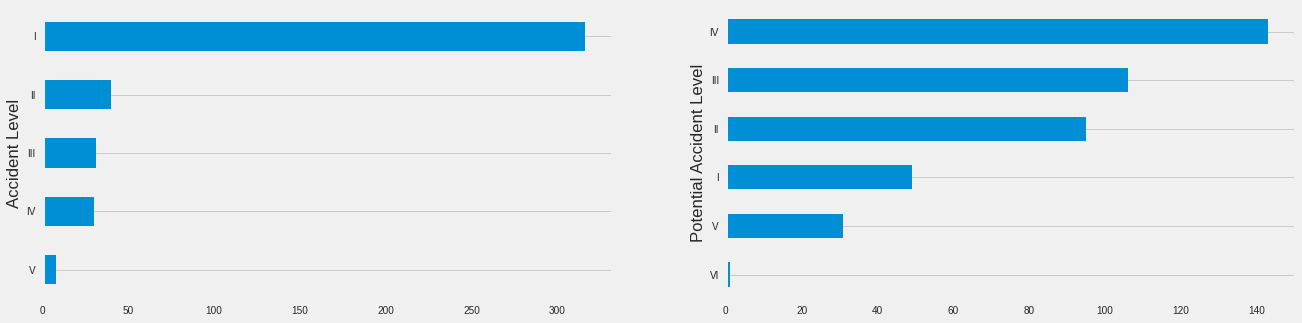

In [223]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
acc_level = "Accident Level"
data[acc_level].reset_index().groupby(acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[0]).grid(axis='x')

pot_acc_level = "Potential Accident Level"
data[pot_acc_level].reset_index().groupby(pot_acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[1]).grid(axis='x')

plt.show()

In [224]:
# Country-wise Stats
fig = px.pie(data, names='Country', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

### There are 59% record samples from Country_01  whereas  from country_02 and Country_03  30% and 10% sample has been taken

In [225]:
# Sector-wise Stats
fig = px.pie(data, names='Industry Sector', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

### Most of the sample data has been taken from Mining industry whereas  from Metals there is 31% samples and from Others 11% samples has been gathered  

In [226]:
# Employee type
fig = px.pie(data, names='Employee type', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

### The samples for Third Party is 45% whereas 42% samples are from Employee & 13%  samples from Third Party(Remote)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

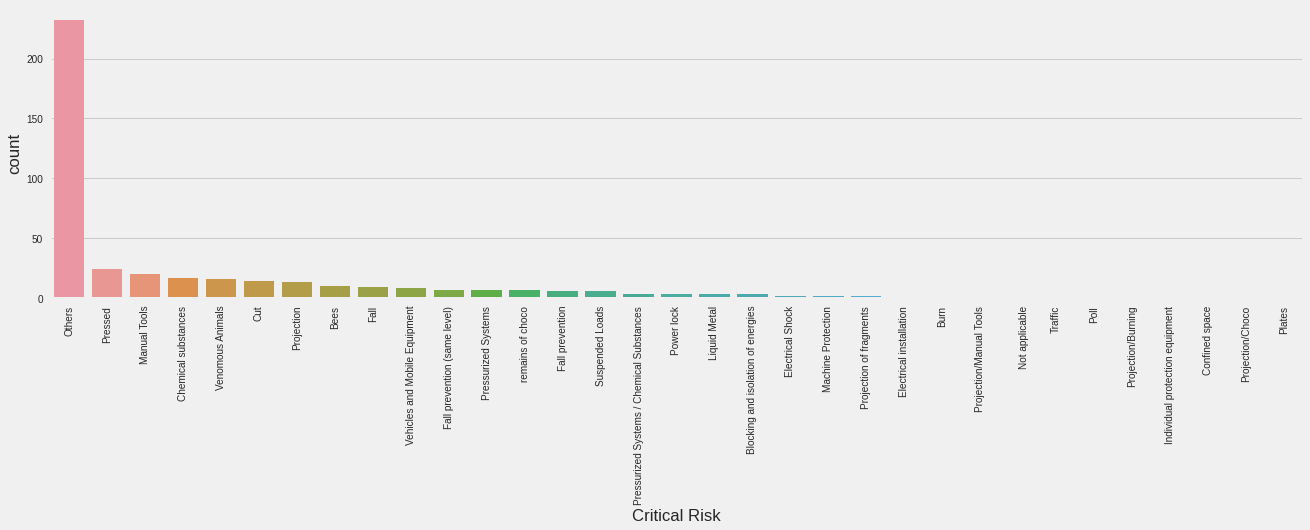

In [227]:
# Look at the Risk Factors and plot the data

plt.figure(figsize=(20,5))
descending_order = data['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(x=data['Critical Risk'],order=descending_order)
plt.xticks(rotation = 'vertical')

In [228]:
## Quarter-wise data to see the mostly affected quarter
fig = px.pie(data, names='Quarter', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

In [229]:
fig = px.pie(data, names='Local', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

# Multivariate Analysis

In [230]:
# Helper function for relation between Accident Level/Potential Accident levels and other labels
def target_count(df, col1):
    fig = plt.figure(figsize = (15, 7.2))
    ax = fig.add_subplot(121)
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title(col1.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Accident Level'].unique())
    plt.xticks(rotation = 90)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title(col1.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Potential Accident Level'].unique())
    plt.xticks(rotation = 90)
    return plt.show()

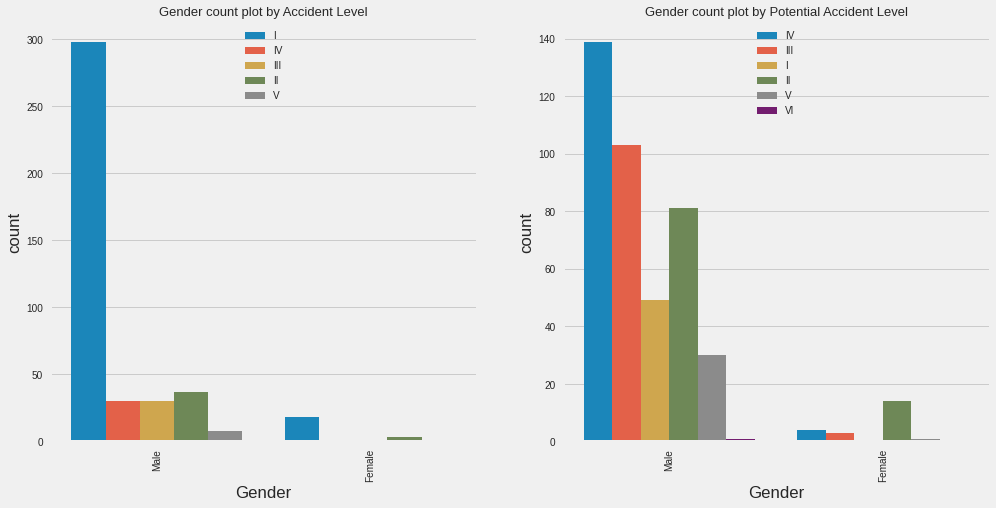

In [231]:
# Gender w.r.t Accident Level and Potential Accident Level
target_count(data, 'Gender')

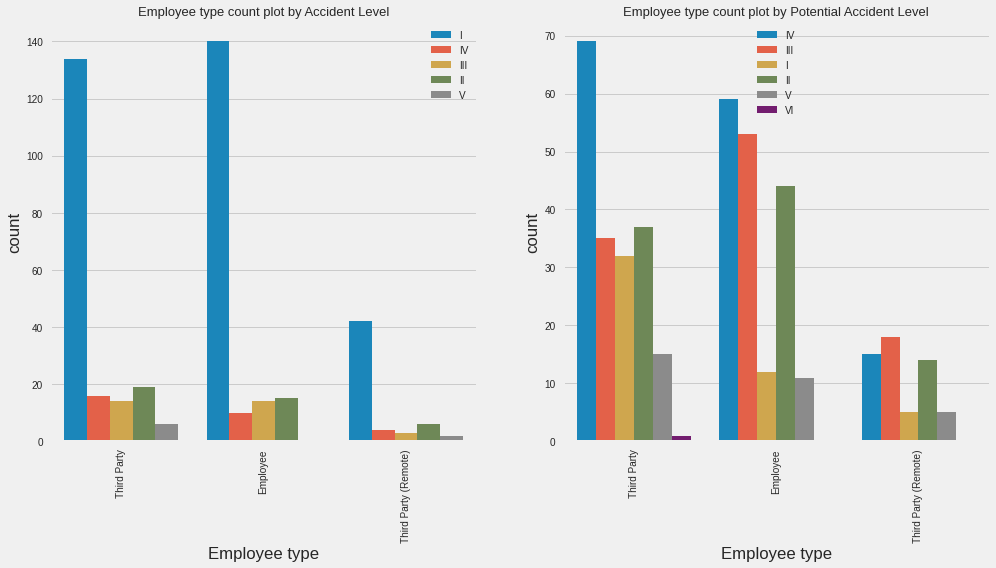

In [232]:
target_count(data, 'Employee type')

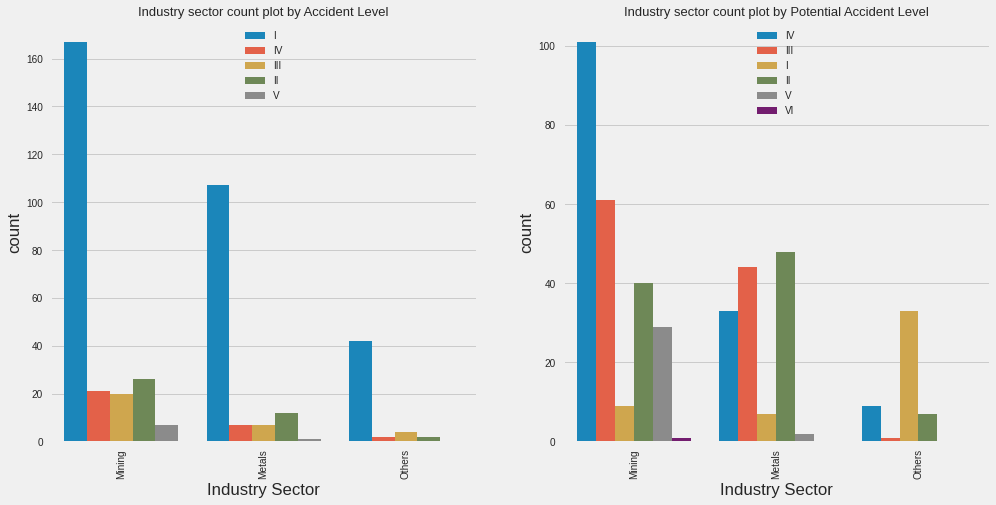

In [233]:
target_count(data, 'Industry Sector')

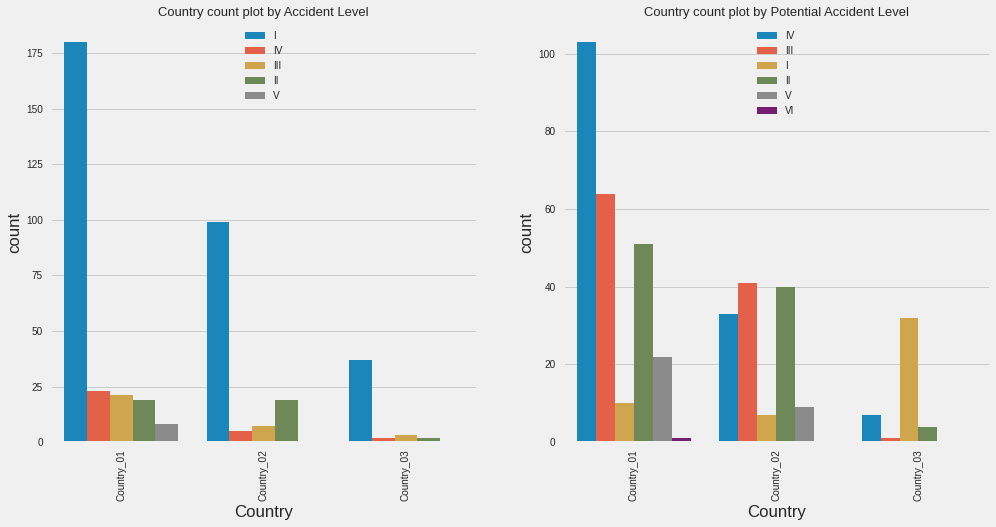

In [234]:
target_count(data, 'Country')

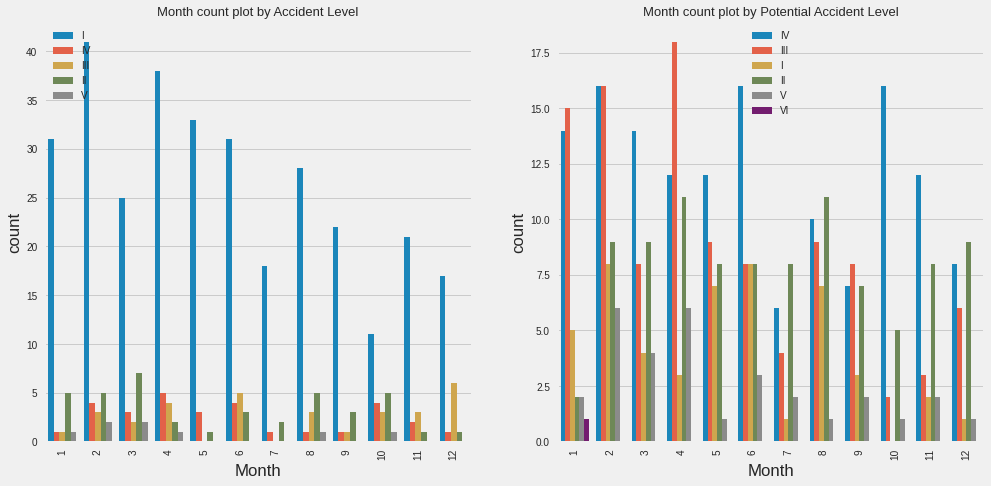

In [235]:
target_count(data, 'Month')

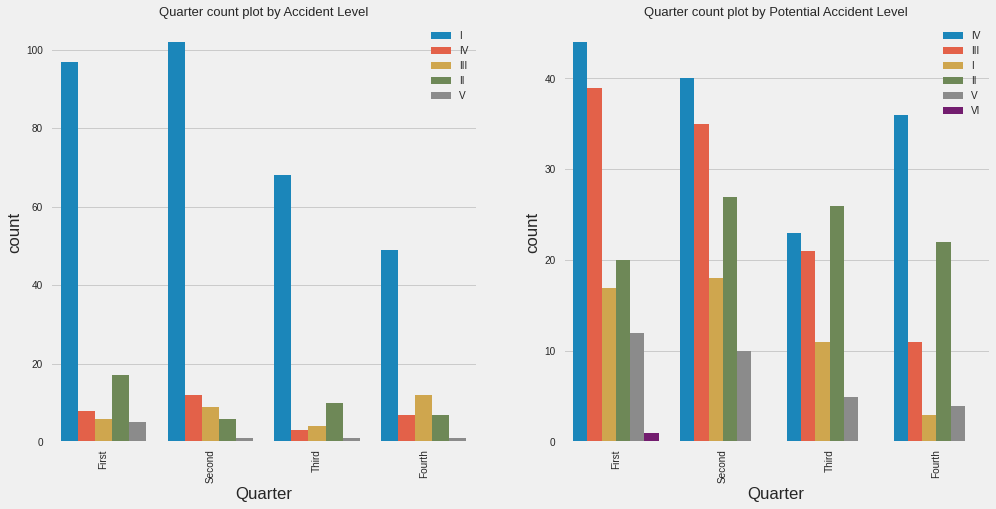

In [236]:
target_count(data, 'Quarter')

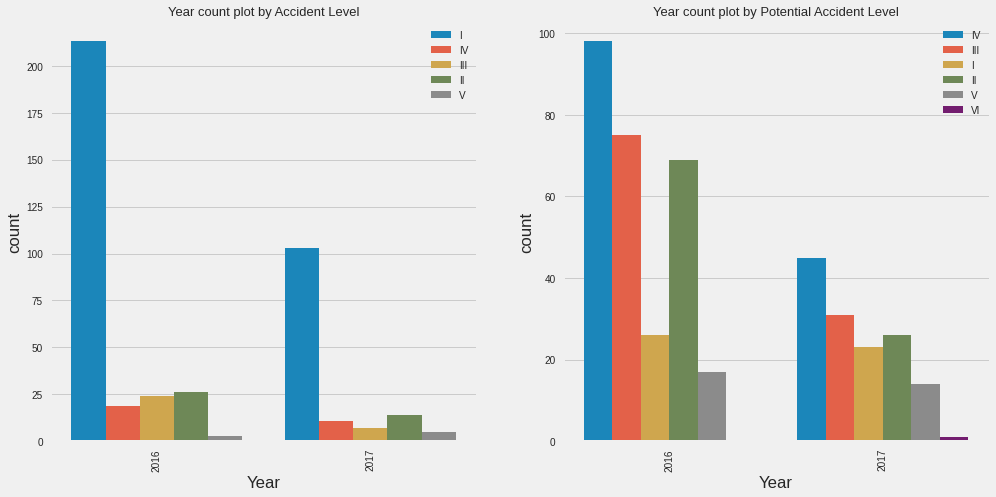

In [237]:
target_count(data, 'Year')

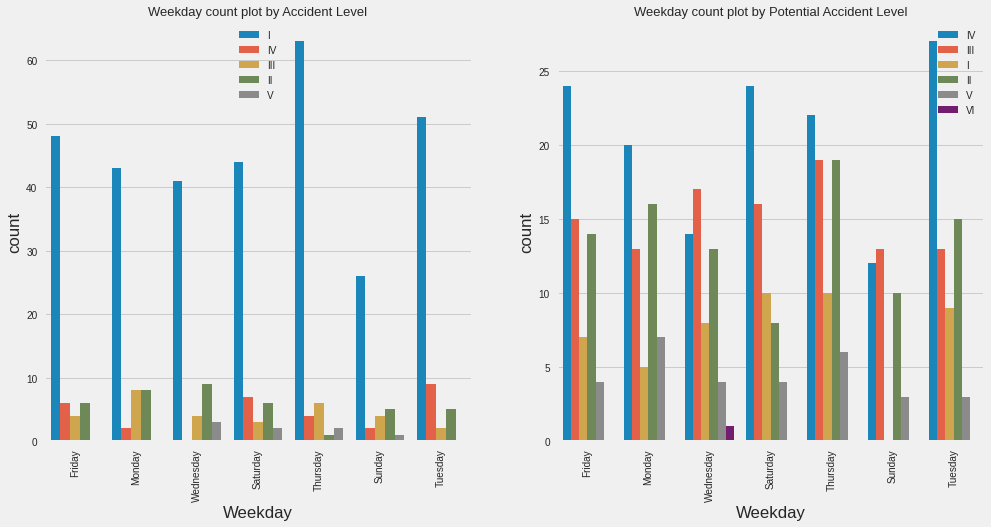

In [238]:
target_count(data, 'Weekday')

In [239]:
# Analyse Coutnry and Employee Type

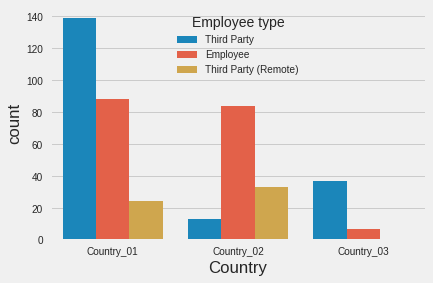

In [240]:
sns.countplot(x="Country", data=data, hue="Employee type")

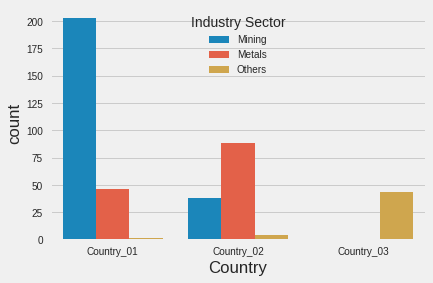

In [241]:
sns.countplot(x="Country", data=data, hue="Industry Sector")

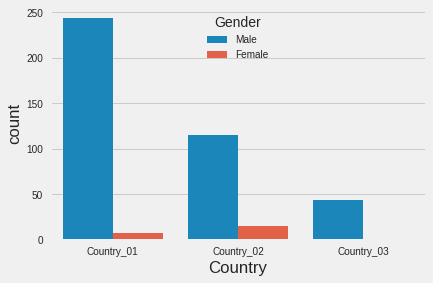

In [242]:
sns.countplot(x="Country", data=data,hue="Gender")

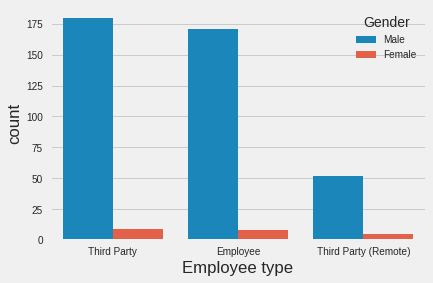

In [243]:
sns.countplot(x="Employee type", data=data,hue="Gender")

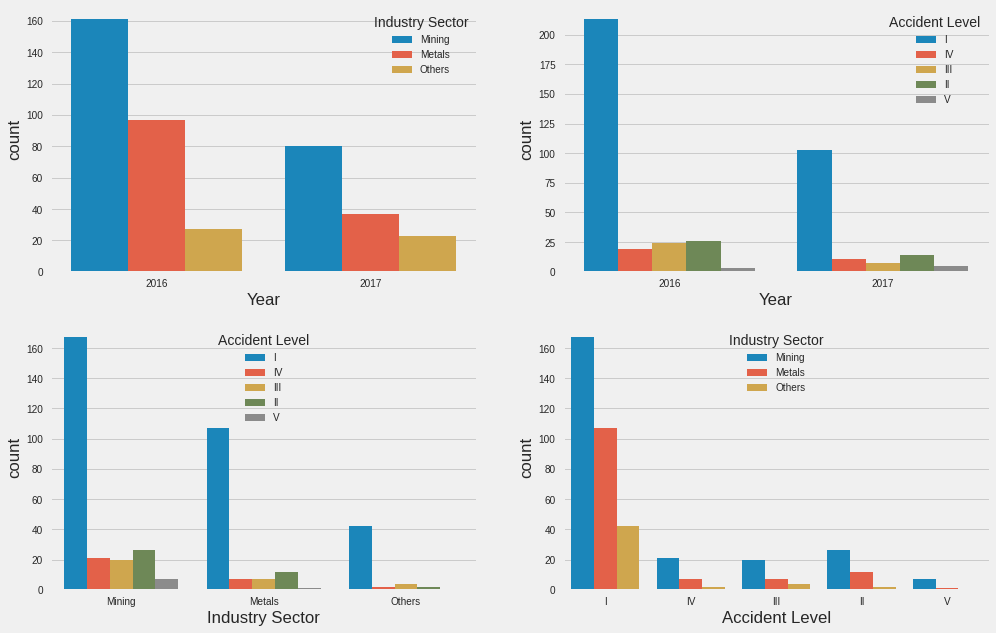

In [244]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.countplot(x=data['Year'],hue='Industry Sector',data=data,ax=axs[0][0])
sns.countplot(x=data['Year'],hue='Accident Level',data=data,ax=axs[0][1])
sns.countplot(x=data['Industry Sector'],hue='Accident Level',data=data,ax=axs[1][0])
sns.countplot(x=data['Accident Level'],hue='Industry Sector',data=data,ax=axs[1][1])

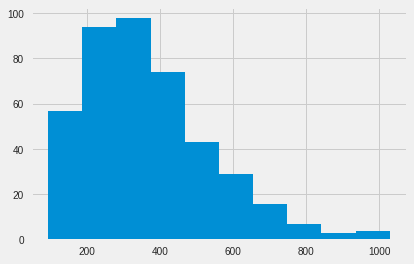

In [245]:
# Analyse Text Statistics
data['Description'].str.len().hist() # number of characters in each sentence

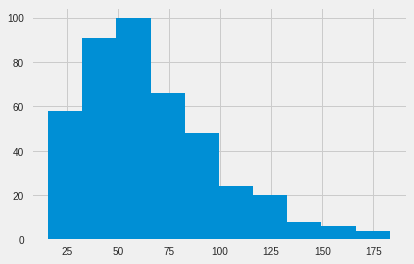

In [246]:
# Number of words in each description
data['Description'].str.split().map(lambda x: len(x)).hist()

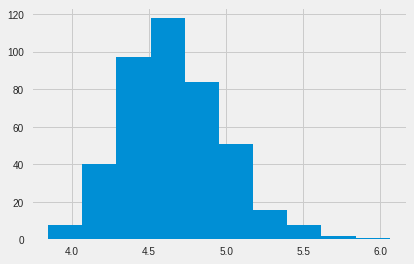

In [247]:
# Average Word Length
data['Description'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

# Next steps towards stopword and other text analysis

In [248]:
data.columns

Index(['Unnamed: 0', 'Date', 'Country', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Gender', 'Employee type',
       'Critical Risk', 'Description', 'Year', 'Month', 'Day', 'Weekday',
       'Quarter'],
      dtype='object')

In [249]:
print("*"*30)
print("Droping unwanted coulmns")
data = data.drop(data.columns[[0]],axis=1)


******************************
Droping unwanted coulmns


In [250]:
# Removing punctuations
def punct_remover(data):
  data= data.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
  print(f'punctuations {string.punctuation} removed from Description coulmn')
  return data

# Contractions expension
def contaction_exp(data):
  data = data.apply(lambda x: contractions.fix(x))
  print("contractions expension on the Description column completed")
  return data

# Convert text to lowercase
def to_lower(data):
  data = data.apply(lambda x: x.lower())
  print("Converted Description to lowercase")
  return data

#Remove single letter word
def rm_singles(data):
  data = data.apply(lambda x:re.sub(r'\b\w{1}\b',"",x ,flags=re.I))
  print("Removed the single letter from the Description column data")
  return data

#Remove NA
def rm_na(data):
  data = data.apply(lambda x:re.sub(r'\bNA\b',"",x ,flags=re.I))
  print("Removed the NA from the Description column data")
  return data


#Removing the email addresses
def rm_emails(data):
  data = data.apply(lambda x: re.sub(r"\S+@\S+", "",x ,flags=re.I))
  print("Removed email id from the Description column data")
  return data

#Remove all date formats 
#pattern_str="^(?:\d{1,2}(?:(?:-|/)|(?:th|st|nd|rd)?\s))?(?:(?:(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)(?:(?:-|/)|(?:,|\.)?\s)?)?(?:\d{1,2}(?:(?:-|/)|(?:th|st|nd|rd)?\s))?)(?:\d{2,4})$"
def rm_date_format(data):
  data = data.apply(lambda x: re.sub(r"^(?:\d{1,2}(?:(?:-|/)|(?:th|st|nd|rd)?\s))?(?:(?:(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)(?:(?:-|/)|(?:,|\.)?\s)?)?(?:\d{1,2}(?:(?:-|/)|(?:th|st|nd|rd)?\s))?)(?:\d{2,4})$", "",x ,flags=re.I))
  print("Removed date from the Description column data")
  return data

#Remove digits
def rm_digit(data):
  data = data.apply(lambda x: re.sub(r"\d", "",x ,flags=re.I))
  print("Removed digits from the Description column data")
  return data

# Strip unwanted spaces
def rm_unwanted_spaces(data):
  data = data.apply(lambda x: re.sub(' +', ' ', x))
  print("Striped unwanted spaces from the Description column data")
  return data

# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
def rm_stopwords(data):
  data = data.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
  print("Removed the stopwords in the Description column")
  return data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [251]:
# cleaning on Description
data['Description'] = to_lower(data['Description']) # lowering the letters
data['Description'] = punct_remover(data['Description'])  # removing punctuations 
data['Description'] = contaction_exp(data['Description']) # contaction expansion
data['Description'] = rm_singles(data['Description'])  # removing single characters
data['Description'] = rm_na(data['Description'])  # removing NA
data['Description'] = rm_emails(data['Description']) # removing emails
data['Description'] = rm_date_format(data['Description']) # removing dates
data['Description'] = rm_digit(data['Description'])  # removing digits
data['Description'] = rm_unwanted_spaces(data['Description']) # removing unwanted spaces
data['Description'] = rm_stopwords(data['Description']) # stopwords removed
data['Description'].head(10)

Converted Description to lowercase
punctuations !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ removed from Description coulmn
contractions expension on the Description column completed
Removed the single letter from the Description column data
Removed the NA from the Description column data
Removed email id from the Description column data
Removed date from the Description column data
Removed digits from the Description column data
Striped unwanted spaces from the Description column data
Removed the stopwords in the Description column


0    removing drill rod jumbo maintenance superviso...
1    activation sodium sulphide pump piping uncoupl...
2    substation milpo located level collaborator ex...
3    approximately nv cx ob personnel begins task u...
4    approximately circumstances mechanics anthony ...
5    unloading operation ustulado bag need unclog d...
6    collaborator reports street holding left hand ...
7    approximately pm mechanic technician josé tecn...
8    employee sitting resting area level raise bore...
9    moment forklift operator went manipulate big b...
Name: Description, dtype: object

In [252]:
data_split = pd.Series(' '.join(rm_stopwords(to_lower(data.Description))).split()).value_counts( ascending=False)[:50] ## Most used words 
data_split

Converted Description to lowercase
Removed the stopwords in the Description column


causing          166
hand             166
left             160
right            155
employee         154
operator         122
injury           105
time             101
activity          94
area              81
moment            79
one               79
equipment         77
work              77
accident          73
level             71
collaborator      68
finger            68
pipe              67
floor             65
assistant         62
worker            60
mesh              58
support           58
cm                55
rock              55
mr                54
safety            53
approximately     48
meters            48
height            47
part              45
described         45
side              43
kg                43
team              42
metal             42
used              42
face              42
injured           41
pump              40
circumstances     40
towards           39
gloves            39
truck             39
hit               38
medical           38
cut          

In [253]:
print("Lemetizeing the words")
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
wordNet = WordNetLemmatizer()

def lem(text):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV }
    return(' '.join([wordNet.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))

print('Applying Lemmatizer')
data['Description'] = data['Description'].apply(lambda x: lem(x))

Lemetizeing the words
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Applying Lemmatizer


In [254]:
data_split = pd.Series(' '.join(data.Description).split()).value_counts( ascending=True)[:50] ## Least used words 
data_split

distracted      1
dismount        1
fisherman       1
sickle          1
pedal           1
tightened       1
brushcutters    1
period          1
cadmium         1
lash            1
alex            1
sa              1
extraction      1
month           1
comfort         1
ronald          1
eriks           1
doosan          1
inferior        1
waiting         1
mini            1
disposal        1
labor           1
mário           1
remains         1
band            1
touch           1
kitchen         1
containment     1
trailer         1
excessive       1
manitou         1
stationed       1
lxpb            1
pivot           1
cylindrical     1
machinery       1
stylet          1
flexible        1
gilton          1
taking          1
eka             1
thus            1
mixer           1
yolk            1
pyrotechnic     1
explosion       1
readjusted      1
diverting       1
untied          1
dtype: int64

In [255]:
data['Description'].head(10)

0    removing drill rod jumbo maintenance superviso...
1    activation sodium sulphide pump piping uncoupl...
2    substation milpo located level collaborator ex...
3    approximately nv cx ob personnel begin task un...
4    approximately circumstance mechanic anthony gr...
5    unloading operation ustulado bag need unclog d...
6    collaborator report street holding left hand v...
7    approximately pm mechanic technician josé tecn...
8    employee sitting resting area level raise bore...
9    moment forklift operator went manipulate big b...
Name: Description, dtype: object

In [256]:
text=" ".join(description for description in data.Description )

In [257]:
len(text.split())

14018

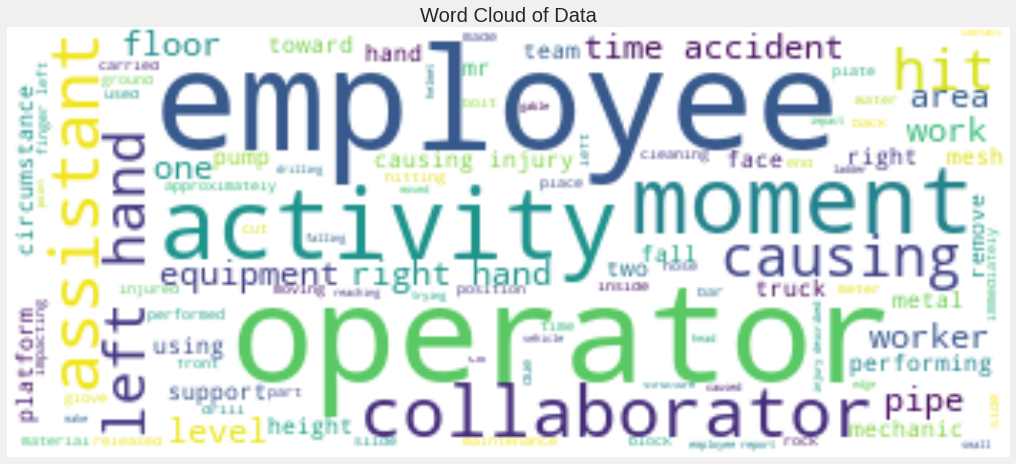

In [258]:

# lower max_font_size, change the maximum number of word and lighten the background:
def plot_wordcloud(text,title):
  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",width = 350, height = 150,collocations = True).generate(text)
  plt.figure(figsize=(16,8))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.title(title)
  plt.axis("off")
  plt.show()

plot_wordcloud(text,"Word Cloud of Data")

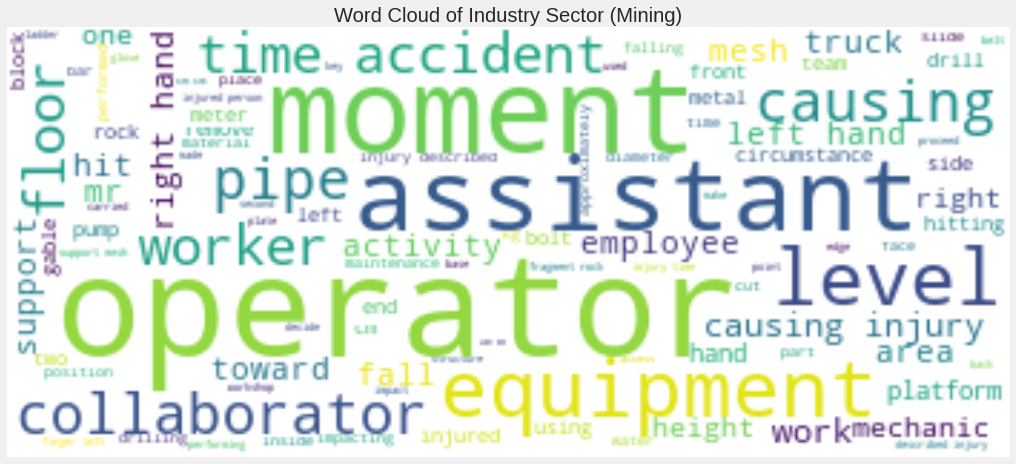

In [259]:
filter_data = ' '.join((data.loc[data['Industry Sector'] == 'Mining']).Description)
plot_wordcloud(filter_data,"Word Cloud of Industry Sector (Mining)")

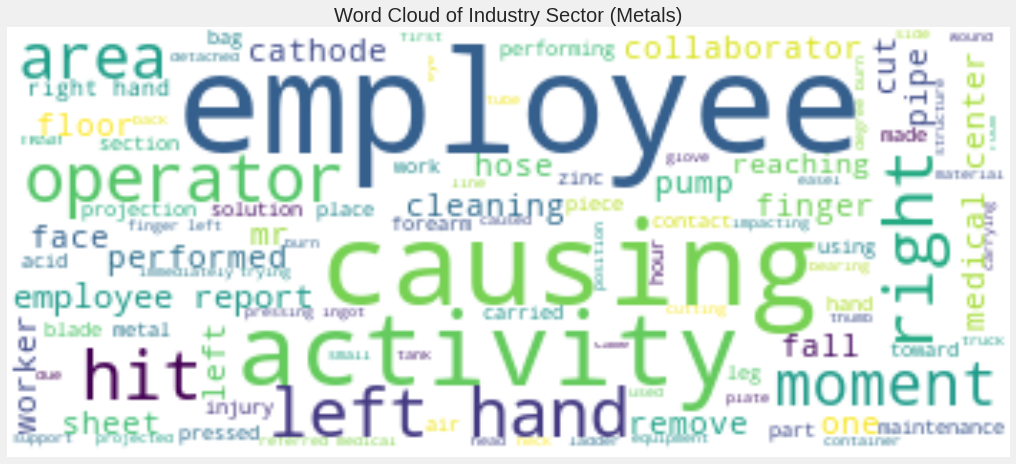

In [260]:
filter_data = ' '.join((data.loc[data['Industry Sector'] == 'Metals']).Description)
plot_wordcloud(filter_data,"Word Cloud of Industry Sector (Metals)")

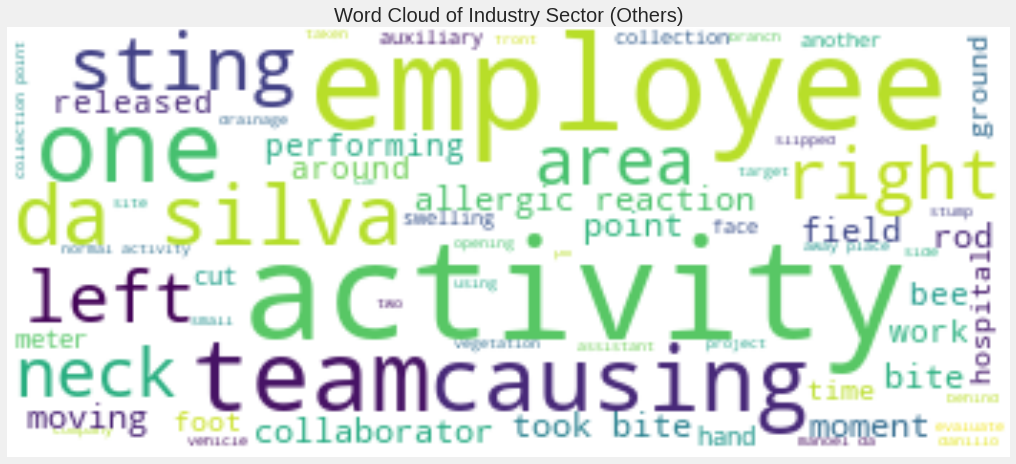

In [261]:
filter_data = ' '.join((data.loc[data['Industry Sector'] == 'Others']).Description)
plot_wordcloud(filter_data,"Word Cloud of Industry Sector (Others)")

In [262]:
data['labels'] = data.apply(lambda row: [row['Accident Level'], row['Potential Accident Level']], axis=1)

In [263]:
data['labels'].head()

0     [I, IV]
1     [I, IV]
2    [I, III]
3      [I, I]
4    [IV, IV]
Name: labels, dtype: object

In [264]:
## One hot encoding 
data.head(2)


,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,Quarter,labels
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,removing drill rod jumbo maintenance superviso...,2016,1,1,Friday,First,"[I, IV]"
1,2016-02-01,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,activation sodium sulphide pump piping uncoupl...,2016,2,1,Monday,First,"[I, IV]"


In [265]:
X=data.drop(['Accident Level','Potential Accident Level','Year','Month','Day','Weekday','Quarter','labels'],axis=1)

In [266]:
X.head()

,Date,Country,Local,Industry Sector,Gender,Employee type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,Male,Third Party,Pressed,removing drill rod jumbo maintenance superviso...
1,2016-02-01,Country_02,Local_02,Mining,Male,Employee,Pressurized Systems,activation sodium sulphide pump piping uncoupl...
2,2016-06-01,Country_01,Local_03,Mining,Male,Third Party (Remote),Manual Tools,substation milpo located level collaborator ex...
3,2016-08-01,Country_01,Local_04,Mining,Male,Third Party,Others,approximately nv cx ob personnel begin task un...
4,2016-10-01,Country_01,Local_04,Mining,Male,Third Party,Others,approximately circumstance mechanic anthony gr...


In [267]:
X['Country'] = to_lower(X['Country'])
X['Local'] = to_lower(X['Local'])
X['Industry Sector'] = to_lower(X['Industry Sector'])
X['Gender'] = to_lower(X['Gender'])
X['Employee type'] = to_lower(X['Employee type'])
X['Critical Risk'] = to_lower(X['Critical Risk'])

Converted Description to lowercase
Converted Description to lowercase
Converted Description to lowercase
Converted Description to lowercase
Converted Description to lowercase
Converted Description to lowercase


In [268]:
X.head()

,Date,Country,Local,Industry Sector,Gender,Employee type,Critical Risk,Description
0,2016-01-01,country_01,local_01,mining,male,third party,pressed,removing drill rod jumbo maintenance superviso...
1,2016-02-01,country_02,local_02,mining,male,employee,pressurized systems,activation sodium sulphide pump piping uncoupl...
2,2016-06-01,country_01,local_03,mining,male,third party (remote),manual tools,substation milpo located level collaborator ex...
3,2016-08-01,country_01,local_04,mining,male,third party,others,approximately nv cx ob personnel begin task un...
4,2016-10-01,country_01,local_04,mining,male,third party,others,approximately circumstance mechanic anthony gr...


In [269]:
X = pd.get_dummies(X,columns=['Country','Local','Gender','Industry Sector','Employee type','Critical Risk'])

In [270]:
X.head()

,Date,Description,Country_country_01,Country_country_02,Country_country_03,Local_local_01,Local_local_02,Local_local_03,Local_local_04,Local_local_05,Local_local_06,Local_local_07,Local_local_08,Local_local_09,Local_local_10,Local_local_11,Local_local_12,Gender_female,Gender_male,Industry Sector_metals,Industry Sector_mining,Industry Sector_others,Employee type_employee,Employee type_third party,Employee type_third party (remote),Critical Risk_\nnot applicable,Critical Risk_bees,Critical Risk_blocking and isolation of energies,Critical Risk_burn,Critical Risk_chemical substances,Critical Risk_confined space,Critical Risk_cut,Critical Risk_electrical installation,Critical Risk_electrical shock,Critical Risk_fall,Critical Risk_fall prevention,Critical Risk_fall prevention (same level),Critical Risk_individual protection equipment,Critical Risk_liquid metal,Critical Risk_machine protection,Critical Risk_manual tools,Critical Risk_others,Critical Risk_plates,Critical Risk_poll,Critical Risk_power lock,Critical Risk_pressed,Critical Risk_pressurized systems,Critical Risk_pressurized systems / chemical substances,Critical Risk_projection,Critical Risk_projection of fragments,Critical Risk_projection/burning,Critical Risk_projection/choco,Critical Risk_projection/manual tools,Critical Risk_remains of choco,Critical Risk_suspended loads,Critical Risk_traffic,Critical Risk_vehicles and mobile equipment,Critical Risk_venomous animals
0,2016-01-01,removing drill rod jumbo maintenance superviso...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2016-02-01,activation sodium sulphide pump piping uncoupl...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2016-06-01,substation milpo located level collaborator ex...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2016-08-01,approximately nv cx ob personnel begin task un...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-10-01,approximately circumstance mechanic anthony gr...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [271]:
y=data['labels']
y.head()

0     [I, IV]
1     [I, IV]
2    [I, III]
3      [I, I]
4    [IV, IV]
Name: labels, dtype: object

In [272]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [273]:
#TFIDF matrix
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_tfidf = vectorizer.fit_transform(X_train['Description'])
X_test_tfidf = vectorizer.transform(X_test['Description'])
vectorizer.get_feature_names()[:5]

['abb', 'abb furnace', 'abb furnace cat', 'abdomen', 'abdomen left']

In [274]:
#Creating bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3))
X_train_bow = vectorizer.fit_transform(X_train['Description'])
X_test_bow = vectorizer.transform(X_test['Description'])

In [275]:
vectorizer.get_feature_names()[:5]

['abb', 'abb furnace', 'abb furnace cat', 'abdomen', 'abdomen left']

In [276]:
#Creating count vector
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 3))
X_train_cv = vectorizer.fit_transform(X_train['Description'])
X_test_cv = vectorizer.transform(X_test['Description'])

In [277]:
vectorizer.get_feature_names()[:5]

['abb', 'abb furnace', 'abb furnace cat', 'abdomen', 'abdomen left']

In [278]:
#view term documant matrix 
df=pd.DataFrame(X_train_tfidf.todense())
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,20404,20405,20406,20407,20408,20409,20410,20411,20412,20413,20414,20415,20416,20417,20418,20419,20420,20421,20422,20423,20424,20425,20426,20427,20428,20429,20430,20431,20432,20433,20434,20435,20436,20437,20438,20439,20440,20441,20442,20443,20444,20445,20446,20447,20448,20449,20450,20451,20452,20453
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [279]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(340, 20454)
(85, 20454)


In [280]:
#view BOW matrix 
df=pd.DataFrame(X_train_bow.todense())
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,20404,20405,20406,20407,20408,20409,20410,20411,20412,20413,20414,20415,20416,20417,20418,20419,20420,20421,20422,20423,20424,20425,20426,20427,20428,20429,20430,20431,20432,20433,20434,20435,20436,20437,20438,20439,20440,20441,20442,20443,20444,20445,20446,20447,20448,20449,20450,20451,20452,20453
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [281]:
print(X_train_bow.shape)
print(X_test_bow.shape)

(340, 20454)
(85, 20454)


In [282]:
#count vector documant matrix 
df=pd.DataFrame(X_train_cv.todense())
df.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,20404,20405,20406,20407,20408,20409,20410,20411,20412,20413,20414,20415,20416,20417,20418,20419,20420,20421,20422,20423,20424,20425,20426,20427,20428,20429,20430,20431,20432,20433,20434,20435,20436,20437,20438,20439,20440,20441,20442,20443,20444,20445,20446,20447,20448,20449,20450,20451,20452,20453
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [283]:
### concatinate TFIDF with other binary features
X_train=X_train.drop(['Description'],axis=1)
X_train.columns

Index(['Date', 'Country_country_01', 'Country_country_02',
       'Country_country_03', 'Local_local_01', 'Local_local_02',
       'Local_local_03', 'Local_local_04', 'Local_local_05', 'Local_local_06',
       'Local_local_07', 'Local_local_08', 'Local_local_09', 'Local_local_10',
       'Local_local_11', 'Local_local_12', 'Gender_female', 'Gender_male',
       'Industry Sector_metals', 'Industry Sector_mining',
       'Industry Sector_others', 'Employee type_employee',
       'Employee type_third party', 'Employee type_third party (remote)',
       'Critical Risk_\nnot applicable', 'Critical Risk_bees',
       'Critical Risk_blocking and isolation of energies',
       'Critical Risk_burn', 'Critical Risk_chemical substances',
       'Critical Risk_confined space', 'Critical Risk_cut',
       'Critical Risk_electrical installation',
       'Critical Risk_electrical shock', 'Critical Risk_fall',
       'Critical Risk_fall prevention',
       'Critical Risk_fall prevention (same level)',

In [284]:
X_test_bk=X_test.copy()
X_test=X_test.drop(['Description'],axis=1)
X_test.head(2)

,Date,Country_country_01,Country_country_02,Country_country_03,Local_local_01,Local_local_02,Local_local_03,Local_local_04,Local_local_05,Local_local_06,Local_local_07,Local_local_08,Local_local_09,Local_local_10,Local_local_11,Local_local_12,Gender_female,Gender_male,Industry Sector_metals,Industry Sector_mining,Industry Sector_others,Employee type_employee,Employee type_third party,Employee type_third party (remote),Critical Risk_\nnot applicable,Critical Risk_bees,Critical Risk_blocking and isolation of energies,Critical Risk_burn,Critical Risk_chemical substances,Critical Risk_confined space,Critical Risk_cut,Critical Risk_electrical installation,Critical Risk_electrical shock,Critical Risk_fall,Critical Risk_fall prevention,Critical Risk_fall prevention (same level),Critical Risk_individual protection equipment,Critical Risk_liquid metal,Critical Risk_machine protection,Critical Risk_manual tools,Critical Risk_others,Critical Risk_plates,Critical Risk_poll,Critical Risk_power lock,Critical Risk_pressed,Critical Risk_pressurized systems,Critical Risk_pressurized systems / chemical substances,Critical Risk_projection,Critical Risk_projection of fragments,Critical Risk_projection/burning,Critical Risk_projection/choco,Critical Risk_projection/manual tools,Critical Risk_remains of choco,Critical Risk_suspended loads,Critical Risk_traffic,Critical Risk_vehicles and mobile equipment,Critical Risk_venomous animals
417,2017-06-22,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75,2016-02-04,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [285]:
## concatinate the  X_train & X_train_tfidf
X_train.head()

,Date,Country_country_01,Country_country_02,Country_country_03,Local_local_01,Local_local_02,Local_local_03,Local_local_04,Local_local_05,Local_local_06,Local_local_07,Local_local_08,Local_local_09,Local_local_10,Local_local_11,Local_local_12,Gender_female,Gender_male,Industry Sector_metals,Industry Sector_mining,Industry Sector_others,Employee type_employee,Employee type_third party,Employee type_third party (remote),Critical Risk_\nnot applicable,Critical Risk_bees,Critical Risk_blocking and isolation of energies,Critical Risk_burn,Critical Risk_chemical substances,Critical Risk_confined space,Critical Risk_cut,Critical Risk_electrical installation,Critical Risk_electrical shock,Critical Risk_fall,Critical Risk_fall prevention,Critical Risk_fall prevention (same level),Critical Risk_individual protection equipment,Critical Risk_liquid metal,Critical Risk_machine protection,Critical Risk_manual tools,Critical Risk_others,Critical Risk_plates,Critical Risk_poll,Critical Risk_power lock,Critical Risk_pressed,Critical Risk_pressurized systems,Critical Risk_pressurized systems / chemical substances,Critical Risk_projection,Critical Risk_projection of fragments,Critical Risk_projection/burning,Critical Risk_projection/choco,Critical Risk_projection/manual tools,Critical Risk_remains of choco,Critical Risk_suspended loads,Critical Risk_traffic,Critical Risk_vehicles and mobile equipment,Critical Risk_venomous animals
17,2016-07-02,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66,2016-03-22,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
132,2016-01-06,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
222,2016-09-22,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,2016-02-19,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [286]:
final_x_train_tfidf = np.concatenate((X_train.to_numpy(),X_train_tfidf.toarray()),axis=1)
final_x_train_bow = np.concatenate((X_train.to_numpy(),X_train_bow.toarray()),axis=1)
final_x_train_cv = np.concatenate((X_train.to_numpy(),X_train_cv.toarray()),axis=1)

In [287]:
final_x_test_tfidf = np.concatenate((X_test.to_numpy(),X_test_tfidf.toarray()),axis=1)
final_x_test_bow = np.concatenate((X_test.to_numpy(),X_test_bow.toarray()),axis=1)
final_x_test_cv = np.concatenate((X_test.to_numpy(),X_test_cv.toarray()),axis=1)

In [288]:
label_counts = dict()

for labels in data.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

In [289]:
label_counts

{'I': 365, 'II': 135, 'III': 137, 'IV': 173, 'V': 39, 'VI': 1}

In [290]:
# Load a multilabel binarizer and fit it on the labels.
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=sorted(label_counts.keys()))
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)
mlb.classes_

array(['I', 'II', 'III', 'IV', 'V', 'VI'], dtype=object)

In [291]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
clf_tfidf = LogisticRegression(solver='liblinear')
clf_bow = LogisticRegression(solver='liblinear')
clf_cv = LogisticRegression(solver='liblinear')

clf_tfidf = OneVsRestClassifier(clf_tfidf)
clf_bow = OneVsRestClassifier(clf_bow)
clf_cv = OneVsRestClassifier(clf_cv)

In [292]:
clf_tfidf.fit(final_x_train_tfidf, y_train)
clf_bow.fit(final_x_train_bow, y_train)
clf_cv.fit(final_x_train_cv, y_train)

TypeError: ignored

In [ ]:
predicted_labels_tfidf = clf_tfidf.predict(final_x_test_tfidf)
predicted_labels_bow = clf_bow.predict(final_x_test_bow)
predicted_labels_cv = clf_cv.predict(final_x_test_cv)

predicted_scores_tfidf = clf_tfidf.decision_function(final_x_test_tfidf)
predicted_scores_bow = clf_bow.decision_function(final_x_test_bow)
predicted_scores_cv = clf_cv.decision_function(final_x_test_cv)
# print(f"predicted_scores for TFIDF = {predicted_scores_tfidf}")
# print(f"predicted_scores for BOW = {predicted_scores_bow}")

In [ ]:
pred_inversed_tfidf = mlb.inverse_transform(predicted_labels_tfidf)
y_test_inversed_tfidf = mlb.inverse_transform(y_test)

pred_inversed_bow = mlb.inverse_transform(predicted_labels_bow)
y_test_inversed_bow = mlb.inverse_transform(y_test)

pred_inversed_cv = mlb.inverse_transform(predicted_labels_cv)
y_test_inversed_cv = mlb.inverse_transform(y_test)

In [ ]:
print(X_test_bk['Description'])

In [ ]:
print(pred_inversed_tfidf)
print(pred_inversed_bow)
print(pred_inversed_cv)

In [ ]:
## TFIDF RESULT
print("*"*20+" RESULT USING TFIDF MATRIX "+"*"*20)

for i in range(5):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
          X_test_bk['Description'][X_test_bk.index[i]],
        ','.join(y_test_inversed_tfidf[i]),
        ','.join(pred_inversed_tfidf[i])
    ))

In [ ]:
## TFIDF RESULT
print("*"*20+" RESULT USING BOW MATRIX "+"*"*20)

for i in range(5):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test_bk['Description'][X_test_bk.index[i]],
        ','.join(y_test_inversed_bow[i]),
        ','.join(pred_inversed_bow[i])
    ))

In [ ]:
## COUNT VECTOR RESULT
print("*"*20+" RESULT USING COUNT VECTOR MATRIX "+"*"*20)

for i in range(5):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test_bk['Description'][X_test_bk.index[i]],
        ','.join(y_test_inversed_cv[i]),
        ','.join(pred_inversed_cv[i])
    ))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_scores(y_val, predicted):
    print('Accuracy score: ', accuracy_score(y_val, predicted))
    print('F1 score: ', f1_score(y_val, predicted, average='micro'))
    print('Average precision score: ', average_precision_score(y_val, predicted, average='micro'))
    print('Average recall score: ', recall_score(y_val, predicted, average='micro'))

In [ ]:
print('With TFIDF the model stats')
print_evaluation_scores(y_test, predicted_labels_tfidf)

In [ ]:
  print('With BOW the model stats')
print_evaluation_scores(y_test, predicted_labels_bow)

In [ ]:
print('With COUNT VECTOR the model stats')
print_evaluation_scores(y_test, predicted_labels_cv)